In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/IR_Project/2019-Oct.csv')

In [ ]:
df0.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [ ]:
df1 = df0[df0['event_time'].str.contains('2019-10-01') | df0['event_time'].str.contains('2019-10-02') | df0['event_time'].str.contains('2019-10-03') | df0['event_time'].str.contains('2019-10-04') | df0['event_time'].str.contains('2019-10-05')]

In [ ]:
df1.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
6310400,2019-10-05 23:59:57 UTC,view,6400313,2053013554121933129,computers.components.cpu,intel,177.48,546038044,b8338d61-1101-4817-88dc-b29f00ca355c
6310401,2019-10-05 23:59:58 UTC,view,9300047,2053013554524586339,NaN,sony,334.35,515801257,4e59332f-a72c-4c88-a178-4646ba1da5b3
6310402,2019-10-05 23:59:58 UTC,view,4501043,2053013563877884791,appliances.kitchen.hob,hansa,205.41,515945416,ccc1c808-4f60-406f-a6da-a8742ce4d6ba
6310403,2019-10-05 23:59:59 UTC,view,5100627,2053013553341792533,electronics.clocks,garmin,169.86,520207634,5c98cfe2-9670-49e4-811f-419bef2720fe
6310404,2019-10-05 23:59:59 UTC,view,2601529,2053013563970159485,NaN,redmond,48.63,557193760,fdc7f7ca-10dc-467d-a963-8a65397bf4e6


In [ ]:
df1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [ ]:
type(df1.iloc[1]['category_code'])

str

In [ ]:
df1 = df1.fillna('')

In [ ]:
df2 = df1[df1['category_code'].str.contains('computers.')]

In [ ]:
df = df2

In [ ]:
interaction_map = {'view':1,'cart':10,'purchase':50}

In [ ]:
df['user_score'] = df['event_type'].map(interaction_map)
df['user_purchase'] = df['event_type'].apply(lambda x: 1 if x=='purchase' else 0)
df['price_category'] = 0

In [ ]:
len(df['category_code'].unique())

15

In [ ]:
categs = df['category_code'].unique()

In [ ]:
categs

array(['computers.notebook', 'computers.desktop',
       'computers.peripherals.monitor', 'computers.components.videocards',
       'computers.peripherals.keyboard',
       'computers.components.motherboard', 'computers.peripherals.mouse',
       'computers.peripherals.printer', 'computers.components.memory',
       'computers.ebooks', 'computers.components.power_supply',
       'computers.components.cpu', 'computers.components.hdd',
       'computers.components.cooler', 'computers.peripherals.camera'],
      dtype=object)

In [ ]:
len(categs)

15

In [ ]:
price_series = list()

In [ ]:
for i in range(len(categs)):
  serie = df[df['category_code'] == categs[i]]['price']
  price_series.append(serie)

In [ ]:
qcut_series = []

In [ ]:
for i in range(len(categs)):
  qcut_serie = pd.qcut(price_series[i], q=5, labels=[1,2,3,4,5])
  qcut_series.append(qcut_serie)

In [ ]:
for idx, element in enumerate(df['category_code'].unique()):
  df.price_category[df['category_code']==element] = qcut_series[idx]

In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_score,user_purchase,price_category
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,1,0,1.0
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,1,0,5.0
18,2019-10-01 00:00:19 UTC,view,1306631,2053013558920217191,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,1,0,3.0
22,2019-10-01 00:00:22 UTC,view,1480714,2053013561092866779,computers.desktop,pulser,921.49,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,1,0,5.0
50,2019-10-01 00:00:37 UTC,view,1701111,2053013553031414015,computers.peripherals.monitor,acer,514.79,547028884,3ea7c620-a8d7-45c5-9ced-2e9874e2f549,1,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6310330,2019-10-05 23:59:20 UTC,view,1480584,2053013561092866779,computers.desktop,hp,984.20,514752680,d17778a4-d468-4c41-a17d-f3c47f739d8d,1,0,5.0
6310369,2019-10-05 23:59:40 UTC,view,1480584,2053013561092866779,computers.desktop,hp,984.20,514752680,d17778a4-d468-4c41-a17d-f3c47f739d8d,1,0,5.0
6310390,2019-10-05 23:59:50 UTC,view,1480171,2053013561092866779,computers.desktop,acer,823.67,514752680,d17778a4-d468-4c41-a17d-f3c47f739d8d,1,0,4.0
6310398,2019-10-05 23:59:55 UTC,view,1306556,2053013558920217191,computers.notebook,lenovo,926.64,513465266,8576dd95-91d5-47c3-aa50-6220118fbd38,1,0,4.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

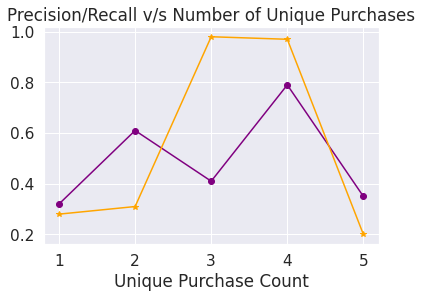

In [ ]:
plt.plot(unique_purchase_count, prec_list, label='Precision', marker='o', color='purple')
plt.plot(unique_purchase_count, rec_list, label='Recall', marker='*', color='orange')
plt.xlabel('Unique Purchase Count')
plt.title('Precision/Recall v/s Number of Unique Purchases')
plt.show()

In [ ]:
user_prod_grp = df.groupby(['user_id','product_id'])['user_score','user_purchase'].sum().reset_index()

user_prod_grp['user_purchase'] = user_prod_grp['user_purchase'].apply(lambda x: 1 if x>1 else x)
std = MinMaxScaler(feature_range=(0.025, 1))
user_prod_grp['user_score'] = user_prod_grp['user_score'].apply(lambda x: 100 if x>100 else x)

std.fit(user_prod_grp['user_score'].values.reshape(-1,1))
user_prod_grp['interaction_score'] = std.transform(user_prod_grp['user_score'].values.reshape(-1,1))

user_prod_grp = user_prod_grp.merge(df[['product_id','category_code','brand','price','price_category']].drop_duplicates('product_id'),on=['product_id'])

<ipython-input-26-27fa9ed17171>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = df.groupby(['user_id','product_id'])['user_score','user_purchase'].sum().reset_index()


In [ ]:
user_prod_grp

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# importing data
print(df.head())
  
# using the train test split function
X_train, X_test = train_test_split(df,test_size=0.4)

In [ ]:
X_train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_score,user_purchase,price_category
3044405,2019-10-03 13:02:07 UTC,view,1500450,2053013552955916539,computers.peripherals.printer,hp,113.79,536500691,3cba19ce-a51e-4da8-995f-773a198435b6,1,0,1.0
360061,2019-10-01 08:25:16 UTC,view,1307188,2053013558920217191,computers.notebook,hp,223.69,544939229,d6ed5d1a-e70f-46ee-9aa6-a6baac4aee57,1,0,1.0
5456060,2019-10-05 09:06:40 UTC,view,1306021,2053013558920217191,computers.notebook,lenovo,468.48,554770611,6dc0c309-b813-4c6d-bd89-13ed0728aba8,1,0,3.0
961039,2019-10-01 16:32:29 UTC,view,25900029,2053013563718501229,computers.components.cooler,midea,33.44,540537365,8b1bb6e9-9c43-44a6-b7b5-858483f711c4,1,0,3.0
1437563,2019-10-02 05:30:35 UTC,view,6400313,2053013554121933129,computers.components.cpu,intel,176.97,547203006,6d974bc6-0459-4c3b-8a43-2dd2ecc7e97d,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2831635,2019-10-03 09:15:13 UTC,view,1480452,2053013561092866779,computers.desktop,pulser,411.83,513284542,26f46d42-7369-4fd9-8e7b-fba577f26834,1,0,3.0
5544750,2019-10-05 10:20:47 UTC,view,9101360,2053013552888807671,computers.peripherals.mouse,defender,7.44,513079601,e397b4e0-6509-4af9-a70e-1dd38c0d5cf2,1,0,2.0
256622,2019-10-01 06:58:09 UTC,view,1480707,2053013561092866779,computers.desktop,pulser,501.92,551338649,1707c5d9-5813-4cfe-a820-c9af847da895,1,0,3.0
1236901,2019-10-01 22:49:09 UTC,view,1700906,2053013553031414015,computers.peripherals.monitor,philips,149.02,516707832,126947dd-c239-43d8-aeb4-f4461f7fa94b,1,0,2.0


In [ ]:
X_test

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_score,user_purchase,price_category
3515300,2019-10-03 19:59:29 UTC,view,9101020,2053013552888807671,computers.peripherals.mouse,logitech,88.40,550644371,98e5c42f-e187-49be-b9b0-d87ce0b4d3fb,1,0,5.0
239798,2019-10-01 06:43:01 UTC,view,9200568,2053013552913973497,computers.peripherals.keyboard,,23.42,540274659,29b6e924-c6da-4c76-bbbb-4017e4f6b191,1,0,3.0
2955734,2019-10-03 11:23:13 UTC,view,1306732,2053013558920217191,computers.notebook,asus,360.11,514997490,00457e6d-4bd4-4119-982d-4318ebfa4391,1,0,2.0
5307272,2019-10-05 07:05:45 UTC,view,1307441,2053013558920217191,computers.notebook,acer,555.97,549256521,a89e4036-1394-46fe-bd3d-151454890f37,1,0,3.0
5585927,2019-10-05 10:55:17 UTC,view,17800442,2053013559868129947,computers.desktop,dxracer,257.15,513094874,2686cf24-5c50-4b69-a555-15b587f2b8d7,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4649982,2019-10-04 16:10:33 UTC,view,1307377,2053013558920217191,computers.notebook,lenovo,437.56,540272503,b7880176-34d6-4e91-b24d-55c46b85e40c,1,0,2.0
2891008,2019-10-03 10:14:52 UTC,view,1306797,2053013558920217191,computers.notebook,acer,283.12,513134065,d86fd1b3-6c16-433b-9165-738b6b1450ff,1,0,1.0
722618,2019-10-01 13:49:26 UTC,view,1701040,2053013553031414015,computers.peripherals.monitor,hp,154.19,519975182,04125bf1-725e-4194-b853-6cbe1284bb12,1,0,2.0
2981689,2019-10-03 11:51:43 UTC,view,1307240,2053013558920217191,computers.notebook,asus,385.84,525056695,fb8bfabe-d961-46af-8233-61c1b0de9bd8,1,0,2.0


In [ ]:
train_vals = pd.pivot_table(X_train,values='user_score',index='user_id',columns='product_id')
train_vals = train_vals.fillna(0)


In [ ]:
from pandas.io.formats.info import DataFrameTableBuilder
X_train.to_csv("/content/drive/MyDrive/IR_Project/xtrain.csv")
X_test.to_csv("/content/drive/MyDrive/IR_Project/xtest.csv")
df.to_csv("/content/drive/MyDrive/IR_Project/fin.csv")

In [ ]:
user_prod_grp.to_csv("/content/drive/MyDrive/IR_Project/group.csv")

In [ ]:
X_train.to_csv("/content/drive/MyDrive/IR_Project/xtrain.csv")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
X_train, X_test = train_test_split(df,test_size=0.4)


In [ ]:
import pandas as pd
# train_vals = pd.read_csv("/content/drive/MyDrive/IR_Project/xtrain.csv")
# X_test=pd.read_csv("/content/drive/MyDrive/IR_Project/xtest.csv")
df=pd.read_csv("/content/drive/MyDrive/IR_Project/fin.csv")

In [ ]:
user_prod_grp=pd.read_csv("/content/drive/MyDrive/IR_Project/group.csv")

In [ ]:
 train_vals = pd.read_csv("/content/drive/MyDrive/IR_Project/xtrain.csv")
 X_test=pd.read_csv("/content/drive/MyDrive/IR_Project/xtest.csv")

In [ ]:
product_cat = X_train[['product_id','price_category','category_code','brand']].drop_duplicates('product_id')
product_cat = product_cat.sort_values(by='product_id')

In [ ]:
price_cat_matrix = np.reciprocal(euclidean_distances(np.array(product_cat['price_category']).reshape(-1,1))+1)
euclidean_matrix = pd.DataFrame(price_cat_matrix,columns=product_cat['product_id'],index=product_cat['product_id'])

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
term_docs = tfidf_vectorizer.fit_transform(list(product_cat['category_code']))


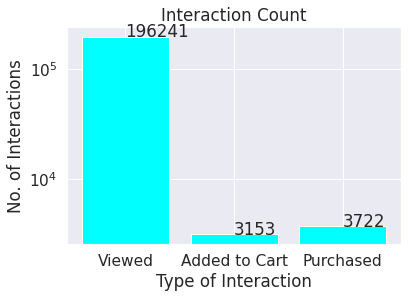

In [ ]:
interactions = ['Viewed', 'Added to Cart', 'Purchased']

plt.bar(interactions, num_interactions, color ='cyan')
writeval(interactions, num_interactions)
 
plt.xlabel("Type of Interaction")
plt.ylabel("No. of Interactions")
plt.title("Interaction Count")
plt.yscale('log')
plt.show()



In [ ]:


dt_matrix = pd.DataFrame(term_docs.toarray().round(3), index=[i for i in product_cat['product_id']], columns=tfidf_vectorizer.get_feature_names_out())
from sklearn.metrics.pairwise import euclidean_distances
cos_similar_matrix = pd.DataFrame(cosine_similarity(dt_matrix.values),columns=product_cat['product_id'],index=product_cat['product_id'])

In [ ]:
product_cat = product_cat.fillna('')
print(product_cat.shape)

(5763, 4)


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
term_docs = tfidf_vectorizer.fit_transform(list(product_cat['brand']))
from sklearn.feature_extraction.text import CountVectorizer
m1_data = pd.DataFrame(term_docs.toarray().round(3), index=[i for i in product_cat['product_id']], columns=tfidf_vectorizer.get_feature_names_out())
m1_data = m1_data + 0.01
m1_cosine_sim = pd.DataFrame(cosine_similarity(m1_data.values),columns=product_cat['product_id'],index=product_cat['product_id'])


In [ ]:
train_vals = pd.pivot_table(X_train,values='user_score',index='user_id',columns='product_id')
train_vals = train_vals.fillna(0)

In [ ]:
print(train_vals.shape)

In [ ]:
sim_data = m1_cosine_sim.multiply(euclidean_matrix).multiply(m1_cosine_sim)
content_matrix = train_vals.dot(sim_data)

In [ ]:
data_content.to_csv("/content/drive/MyDrive/IR_Project/content_matrix.csv")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler(feature_range=(0, 1))
std.fit(data_content.values)
from sklearn.preprocessing import MinMaxScaler
data_content = std.transform(data_content.values)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data_content=pd.read_csv("/content/drive/MyDrive/IR_Project/content_matrix.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_content

In [ ]:
data_content = pd.DataFrame(data_content,columns=sorted(X_train['product_id'].unique()),
                            index=sorted(X_train['user_id'].unique()))
from sklearn.feature_extraction.text import TfidfVectorizer
df_content_fin = data_content.stack().reset_index()
df_content_fin = df_content_fin.rename(columns={'level_0':'user_id',
                                                'level_1':'product_id',
                                                0:'predicted_interaction'})

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

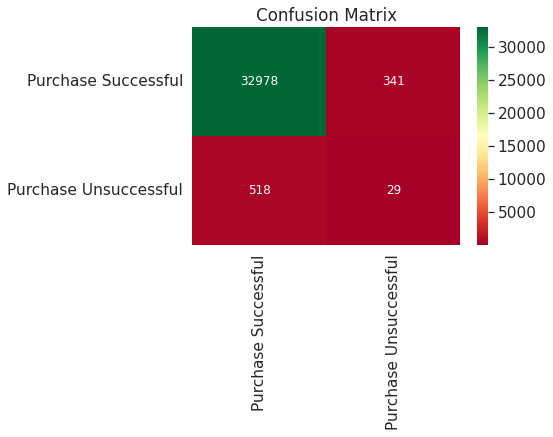

In [ ]:
df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g', 
           xticklabels=['Purchase Successful', 'Purchase Unsuccessful'], 
           yticklabels=['Purchase Successful', 'Purchase Unsuccessful'], 
           cmap="RdYlGn") 
plt.title('Confusion Matrix')

plt.show()

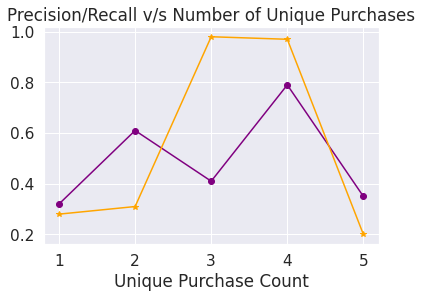

In [ ]:
plt.plot(unique_purchase_count, prec_list, label='Precision', marker='o', color='purple')
plt.plot(unique_purchase_count, rec_list, label='Recall', marker='*', color='orange')
plt.xlabel('Unique Purchase Count')
plt.title('Precision/Recall v/s Number of Unique Purchases')
plt.show()

In [ ]:
def writeval(interactions, num_interactions):
    for i in range(len(interactions)):
        plt.text(i, num_interactions[i], num_interactions[i])

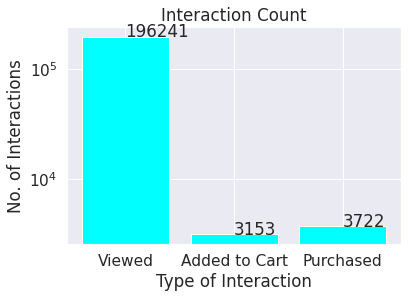

In [ ]:
interactions = ['Viewed', 'Added to Cart', 'Purchased']

plt.bar(interactions, num_interactions, color ='cyan')
writeval(interactions, num_interactions)
 
plt.xlabel("Type of Interaction")
plt.ylabel("No. of Interactions")
plt.title("Interaction Count")
plt.yscale('log')
plt.show()



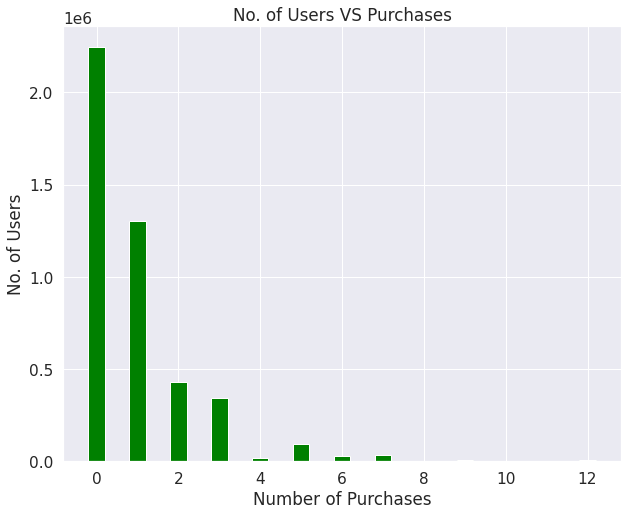

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

courses = [df["users"].unique().count(), df["users"]["cart"].count(), df["users"]["purchases"].count]
values = np.arange(13)

fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(np.arange(13), courses, color ='green', width = 0.4)
 
plt.xlabel("Number of Purchases")
plt.ylabel("No. of Users")
plt.title("No. of Users VS Purchases")
plt.show()